# Multiple Linear Regression with Feature Scaling
#### Used to predict the health of individuals on a scale of 0-1

Please restart the Kernel and run all cells:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Rating: Sleep= 1 to 12 hours, Exercise= 0 to 180 minutes, Diet= scale of 0 to 100 , Genetics= good/average/poor. Output= health on a scale of 0-1.

In [2]:
from numpy.random import rand
s= np.random.uniform(low=1, high=13, size=(33)).astype(float)
s

array([ 4.11280528,  1.47772634,  1.55296489,  1.54531889,  6.40118471,
        3.5223729 , 10.42747839, 12.76393397,  1.58713646,  1.70893702,
        5.74025087,  9.16043238,  9.33324103,  2.32998456,  6.50062588,
        9.91441684, 10.31925628, 11.82819347,  9.96381112,  3.08350794,
       11.53654745,  4.16484787, 10.71463258,  4.30062747, 11.19322481,
        1.2041113 , 10.84716375,  6.27943216,  5.04897548,  3.76538831,
       12.79403339,  5.0319281 ,  9.84090232])

In [3]:
ex= np.random.uniform(low=0, high=181, size=(33)).astype(int)
ex

array([138,  12,  63, 115, 102,  37,   9,  85,  10,  96, 164, 106,  52,
        44,  15,  56,  96, 149,  49, 109, 137,  78, 109, 166,  16,  11,
         9,   7, 131,  79, 153, 123,  98])

In [4]:
d= np.random.uniform(low=0, high=101, size=(33)).astype(float)
d

array([35.24962884, 23.13640174, 57.39372279, 22.66852752, 10.37285826,
       31.8566925 , 65.31137631, 99.11438839, 60.49112835, 27.82710191,
       24.77496628, 54.72126704, 94.61082097,  4.19614761, 82.08347633,
       67.83509463, 44.43628421,  4.82633442, 31.98722863, 41.2341904 ,
       28.87408958,  3.02765555, 62.61057836, 45.73815127, 66.02487485,
       35.40748699, 68.57191592, 47.21519186, 52.76117318, 27.99591991,
       36.36050544, 75.89596656, 99.11534416])

In [5]:
from random import choice
gene=[]
for i in range(1,34):
    gene.append(choice(['good','average','poor'])) 
gene

['good',
 'good',
 'poor',
 'average',
 'average',
 'poor',
 'average',
 'poor',
 'good',
 'poor',
 'good',
 'good',
 'good',
 'poor',
 'good',
 'average',
 'good',
 'average',
 'average',
 'poor',
 'poor',
 'average',
 'good',
 'average',
 'poor',
 'good',
 'good',
 'poor',
 'average',
 'good',
 'poor',
 'good',
 'average']

In [6]:
len(gene)

33

In [7]:
list1=[]
for i in range(0,33):
    list1.append((s[i],ex[i],d[i],gene[i]))
list1

[(4.112805278974692, 138, 35.2496288386753, 'good'),
 (1.4777263390898572, 12, 23.136401736803222, 'good'),
 (1.5529648912613068, 63, 57.39372278524891, 'poor'),
 (1.5453188891861132, 115, 22.668527519077124, 'average'),
 (6.4011847088795815, 102, 10.372858263292258, 'average'),
 (3.52237290469555, 37, 31.856692495580507, 'poor'),
 (10.427478389742582, 9, 65.31137630921816, 'average'),
 (12.763933967531099, 85, 99.11438839376217, 'poor'),
 (1.587136460169798, 10, 60.49112834562378, 'good'),
 (1.7089370165855873, 96, 27.827101911473623, 'poor'),
 (5.740250868604778, 164, 24.77496628168158, 'good'),
 (9.160432382612658, 106, 54.721267043616855, 'good'),
 (9.333241025219333, 52, 94.61082097099587, 'good'),
 (2.3299845604480485, 44, 4.19614761127897, 'poor'),
 (6.500625880080586, 15, 82.08347633452684, 'good'),
 (9.914416844159849, 56, 67.8350946290851, 'average'),
 (10.31925628447977, 96, 44.43628421311329, 'good'),
 (11.82819346558039, 149, 4.826334421416561, 'average'),
 (9.963811121996

In [8]:
df1= pd.DataFrame(list1, columns=['hours_slept','minutes_exercised','diet_rating','genetic_factors'])
df1

,hours_slept,minutes_exercised,diet_rating,genetic_factors
0,4.112805,138,35.249629,good
1,1.477726,12,23.136402,good
2,1.552965,63,57.393723,poor
3,1.545319,115,22.668528,average
4,6.401185,102,10.372858,average
5,3.522373,37,31.856692,poor
6,10.427478,9,65.311376,average
7,12.763934,85,99.114388,poor
8,1.587136,10,60.491128,good
9,1.708937,96,27.827102,poor


In [9]:
df1.to_csv('health data.csv')

In [10]:
y= np.random.uniform(low=0,high=1.01,size=33).astype(float)
y  #health rating

array([0.28568923, 0.12243028, 0.32026351, 0.33114126, 0.51594782,
       0.13965648, 0.58079625, 0.71940836, 0.32026127, 0.68581885,
       0.74854082, 0.02950338, 0.18215239, 0.23261093, 0.22501603,
       0.6408682 , 0.29573307, 0.83836044, 0.6894439 , 1.00337896,
       0.1253066 , 0.29299804, 0.42390352, 0.96905265, 0.78296163,
       0.93431697, 0.69963592, 0.91340243, 0.82961064, 0.36867305,
       0.09696567, 0.24990484, 0.44966545])

In [11]:
y.shape

(33,)

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])],  remainder='passthrough')

X = np.array(ct.fit_transform(list1))

In [13]:
X

array([[0.0, 1.0, 0.0, 4.112805278974692, 138, 35.2496288386753],
       [0.0, 1.0, 0.0, 1.4777263390898572, 12, 23.136401736803222],
       [0.0, 0.0, 1.0, 1.5529648912613068, 63, 57.39372278524891],
       [1.0, 0.0, 0.0, 1.5453188891861132, 115, 22.668527519077124],
       [1.0, 0.0, 0.0, 6.4011847088795815, 102, 10.372858263292258],
       [0.0, 0.0, 1.0, 3.52237290469555, 37, 31.856692495580507],
       [1.0, 0.0, 0.0, 10.427478389742582, 9, 65.31137630921816],
       [0.0, 0.0, 1.0, 12.763933967531099, 85, 99.11438839376217],
       [0.0, 1.0, 0.0, 1.587136460169798, 10, 60.49112834562378],
       [0.0, 0.0, 1.0, 1.7089370165855873, 96, 27.827101911473623],
       [0.0, 1.0, 0.0, 5.740250868604778, 164, 24.77496628168158],
       [0.0, 1.0, 0.0, 9.160432382612658, 106, 54.721267043616855],
       [0.0, 1.0, 0.0, 9.333241025219333, 52, 94.61082097099587],
       [0.0, 0.0, 1.0, 2.3299845604480485, 44, 4.19614761127897],
       [0.0, 1.0, 0.0, 6.500625880080586, 15, 82.083476334526

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

We have now split the dataset.

In [15]:
X_train.shape

(22, 6)

In [16]:
y_test.shape

(11,)

# FEATURE SCALING

In [17]:
from sklearn import preprocessing
a = preprocessing.MinMaxScaler(feature_range =(0, 1))
  
# Scaled feature
b = a.fit_transform(X_train)
b

array([[0.        , 1.        , 0.        , 0.78647164, 0.55974843,
        0.42394097],
       [0.        , 0.        , 1.        , 0.20002392, 0.18867925,
        0.29141149],
       [0.        , 0.        , 1.        , 0.09714244, 0.2327044 ,
        0.        ],
       [0.        , 1.        , 0.        , 0.68648616, 0.62264151,
        0.53229611],
       [0.        , 0.        , 1.        , 0.86187926, 0.05660377,
        0.65138275],
       [0.        , 1.        , 0.        , 0.02360801, 0.03144654,
        0.19954082],
       [0.        , 0.        , 1.        , 0.03009974, 0.35220126,
        0.56045117],
       [0.        , 1.        , 0.        , 0.22099174, 0.45283019,
        0.25073719],
       [1.        , 0.        , 0.        , 0.02944002, 0.67924528,
        0.19461163],
       [0.        , 0.        , 1.        , 0.43790811, 0.        ,
        0.45321753],
       [1.        , 0.        , 0.        , 0.26717317, 1.        ,
        0.4376565 ],
       [0.        , 0

In [18]:
from sklearn.linear_model import LinearRegression
obj1= LinearRegression()
obj1.fit(b,y_train)

LinearRegression()

Now the model has been trained.

In [19]:
a1 = preprocessing.MinMaxScaler(feature_range =(0, 1))
  
# Scaled feature
b1 = a1.fit_transform(X_test)
b1

array([[0.        , 1.        , 0.        , 0.33637071, 0.81428571,
        0.79565181],
       [1.        , 0.        , 0.        , 0.81312704, 0.33571429,
        0.70763485],
       [0.        , 1.        , 0.        , 0.9042062 , 0.        ,
        0.71568022],
       [1.        , 0.        , 0.        , 1.        , 1.        ,
        0.01963984],
       [0.        , 1.        , 0.        , 0.        , 0.00714286,
        0.6274458 ],
       [0.        , 0.        , 1.        , 0.01189336, 0.62142857,
        0.27078608],
       [0.        , 0.        , 1.        , 0.14611494, 0.71428571,
        0.41717858],
       [1.        , 0.        , 0.        , 0.25170365, 0.49285714,
        0.        ],
       [0.        , 1.        , 0.        , 0.75637745, 0.30714286,
        1.        ],
       [0.        , 1.        , 0.        , 0.24662189, 0.92142857,
        0.35183293],
       [1.        , 0.        , 0.        , 0.47007338, 0.66428571,
        0.08020254]])

In [20]:
y_pred= obj1.predict(b1)
y_pred  #predicted rating of health.

array([0.47763264, 0.66428059, 0.43406156, 0.42847318, 0.51967834,
       0.42490074, 0.44117685, 0.54148527, 0.50772435, 0.36861482,
       0.5263107 ])

In [21]:
y_test #actual rating of health.

array([0.24990484, 0.6408682 , 0.69963592, 0.83836044, 0.32026127,
       0.68581885, 1.00337896, 0.29299804, 0.18215239, 0.28568923,
       0.51594782])

In [22]:
y_train  #actual rating of health

array([0.29573307, 0.13965648, 0.23261093, 0.02950338, 0.78296163,
       0.12243028, 0.32026351, 0.36867305, 0.33114126, 0.91340243,
       0.96905265, 0.09696567, 0.42390352, 0.6894439 , 0.93431697,
       0.58079625, 0.1253066 , 0.44966545, 0.71940836, 0.74854082,
       0.22501603, 0.82961064])

In [23]:
obj1.predict(b)  #prediction of health rating from training data.

array([0.34231112, 0.43159481, 0.36675546, 0.37863363, 0.45174155,
       0.40571803, 0.51196052, 0.37175661, 0.60777761, 0.45498842,
       0.62376766, 0.30716765, 0.38279627, 0.56871322, 0.44206913,
       0.66792932, 0.30555373, 0.73431955, 0.50081347, 0.31291819,
       0.51191415, 0.64720279])

In [36]:
v=[]
for i in range(0,22):
    v.append(i)
v

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

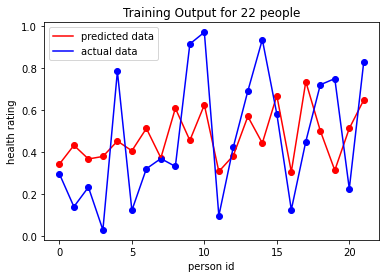

In [37]:
#visualizing the training output
import matplotlib.pyplot as plt
plt.scatter(v,obj1.predict(b),c='red')  #predicted data
plt.plot(v,obj1.predict(b),c='red',label='predicted data')
plt.scatter(v,y_train,c='blue')   #actual data
plt.plot(v,y_train,c='blue',label='actual data')
plt.xlabel('person id')
plt.ylabel('health rating')
plt.title('Training Output for 22 people')
plt.legend()

In [33]:
u=[]
for i in range(0,11):
    u.append(i)
u

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

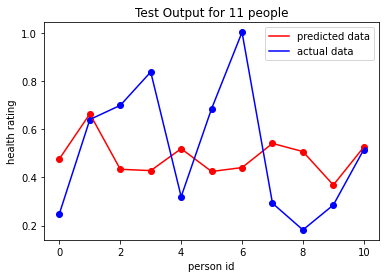

In [38]:
#visualizing the test output

plt.scatter(u,obj1.predict(b1),c='red')  #predicted data
plt.plot(u,obj1.predict(b1),c='red',label='predicted data')
plt.scatter(u,y_test,c='blue')   #actual data
plt.plot(u,y_test,c='blue',label='actual data')
plt.xlabel('person id')
plt.ylabel('health rating')
plt.title('Test Output for 11 people')
plt.legend()